In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine


import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
HI_Measurement = Base.classes.measurement
HI_Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(HI_Measurement.date).order_by(HI_Measurement.date.desc()).first()
print(last_date)
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)




('2017-08-23',)
Query Date : 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(HI_Measurement.date, HI_Measurement.prcp).filter(HI_Measurement.date >= query_date).all()
for record in data:
    print(record)
    
# print(record.head(n=10).to_string(index=False))
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(data, columns = ["date", "prcp"])
rain_df.set_index("date", inplace=True)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-12-30', 0.29)
('2016-12-31', 0.25)
('2017-01-01', 0.03)
('2017-01-02', 0.01)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.06)
('2017-01-06', 0.1)
('2017-01-07', 0.0)
('2017-01-08', 0.0)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-12', 0.0)
('2017-01-13', 0.0)
('2017-01-14', 0.01)
('2017-01-15', 0.0)
('2017-01-16', 0.0)
('2017-01-17', 0.0)
('2017-01-18', 0.0)
('2017-01-19', 0.02)
('2017-01-20', 0.0)
('2017-01-21', 0.03)
('2017-01-22', 0.09)
('2017-01-23', 0.01)
('2017-01-24', 0.13)
('2017-01-25', 0.79)
('2017-01-26', 0.0)
('2017-01-27', 0.03)
('2017-01-28', 0.0)
('2017-01-29', 0.26)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.18)
('2017-02-07', 1.32)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 1.73)
('2017-02-12', 2.98)
('2017-02-13', 0.01)
('2017-02-14', 0.0)
('2017-02-15', 0.01)
('2017-02-16', 0.73)

In [12]:
# Sort the dataframe by date
climate_df = rain_df.sort_values(["date"])
climate_df.head(100)


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2016-09-07,0.05
2016-09-07,0.11
2016-09-07,0.10


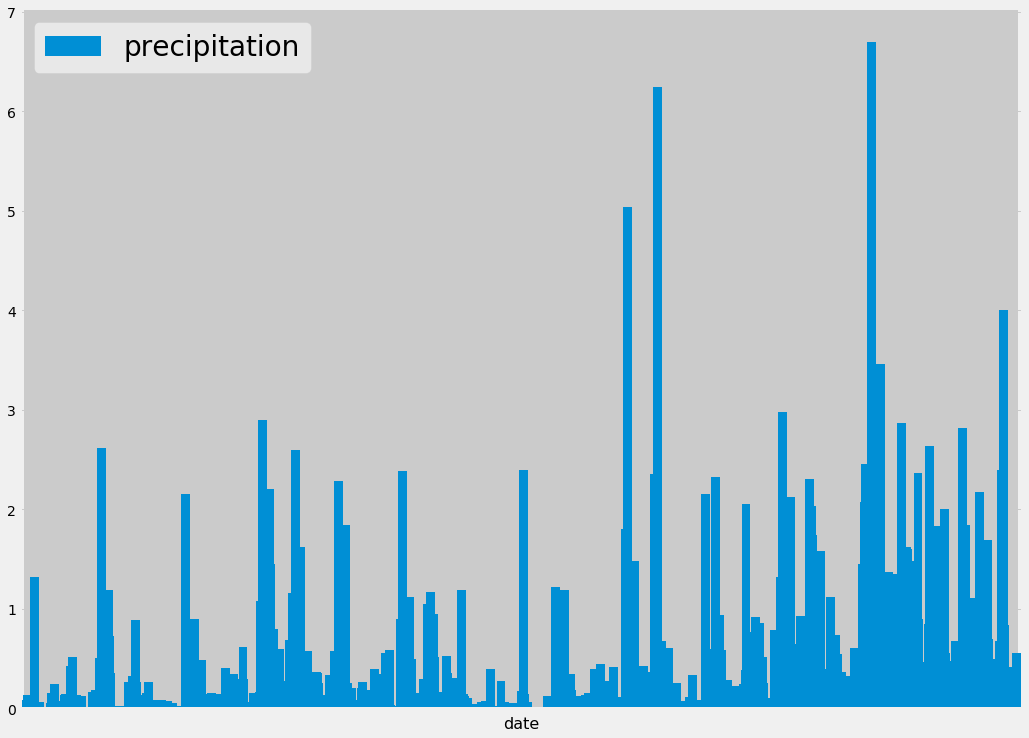

<Figure size 432x288 with 0 Axes>

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= rain_df.plot.bar(figsize=(16,12), width=20)
ax.set_xlabel("date", fontsize=16)
ax.set_xticklabels([])
plt.legend(['precipitation'], fontsize=28)

plt.grid(True)
plt.show()

plt.savefig("Image_save/precipitation.png")

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = climate_df["prcp"].describe()
statistics_df = pd.DataFrame(statistics)
statistics_df.rename(columns = {"prcp": "precipitation"})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(HI_Station).group_by(HI_Station.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(HI_Measurement.station, func.count(HI_Measurement.date)).group_by(HI_Measurement.station).\
    order_by(func.count(HI_Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station=session.query(HI_Measurement.station).group_by(HI_Measurement.station).\
    order_by(func.count(HI_Measurement.date).desc()).first()
active= active_station[0]
active

'USC00519281'

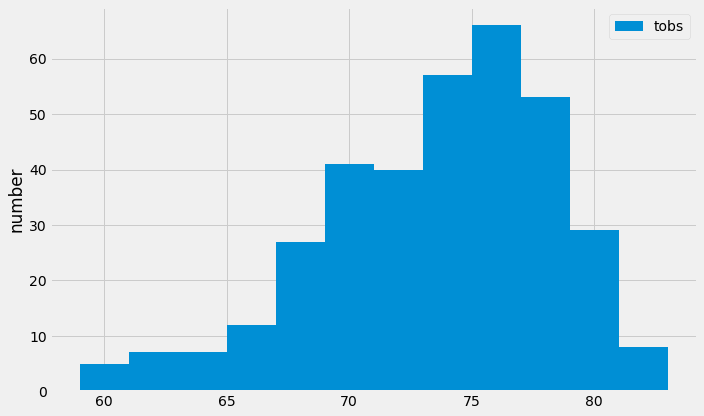

<Figure size 432x288 with 0 Axes>

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(HI_Measurement.tobs).filter(HI_Measurement.station==active).\
    filter(HI_Measurement.date>=query_date).all()
temp_data

temp_df = pd.DataFrame(temp_data, columns=["tobs"])
temp_df.head()

 
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("number")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Save the plot
# plt.tight_layout()
plt.savefig("Image_save/Histogram.png")
plt.show()

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(HI_Measurement.tobs), func.avg(HI_Measurement.tobs), func.max(HI_Measurement.tobs)).\
        filter(HI_Measurement.date >= start_date).filter(HI_Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-02-28', '2017-02-28'))

[(59.0, 74.14365832614322, 84.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(HI_Measurement.tobs), func.avg(HI_Measurement.tobs), func.max(HI_Measurement.tobs)).\
        filter(HI_Measurement.date >= start_date).filter(HI_Measurement.date <= end_date).all()

 
temps = calc_temps('2017-02-28', '2017-03-14')
temps

[(62.0, 71.12903225806451, 82.0)]

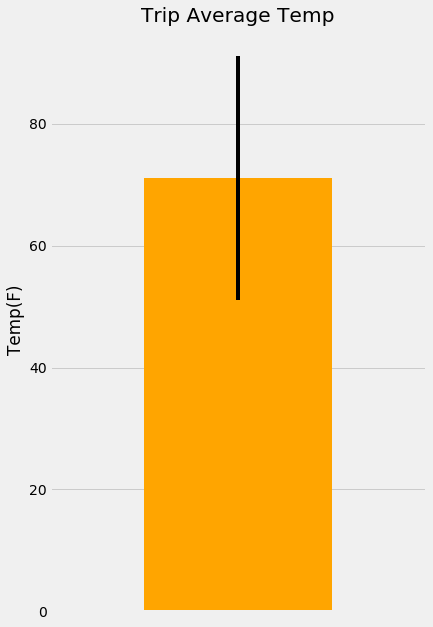

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
TripAve_df = pd.DataFrame(temps, columns=["t_min", "t_avg", "t_max"])

 
plt.figure(figsize=(6,10))
ax=TripAve_df["t_avg"].plot.bar(yerr=(TripAve_df["t_max"]-TripAve_df["t_min"]), color="orange")
plt.title("Trip Average Temp")
plt.ylabel("Temp(F)")
ax.axes.get_xaxis().set_visible(False)
plt.show()

 
plt.tight_layout()
plt.savefig("Image_save/avg_temp.png")
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-02-28'
end_date = '2017-03-14'
triprain = [func.count(HI_Measurement.prcp),HI_Measurement.station, HI_Station.name, HI_Station.latitude, HI_Station.longitude,HI_Station.elevation]
rainfall=session.query(*triprain).filter(HI_Measurement.station==HI_Station.station).\
    group_by(HI_Measurement.station).\
    filter(HI_Measurement.date >= start_date).filter(HI_Measurement.date <= end_date).\
    order_by(func.count(HI_Measurement.prcp).desc()).all()
for r in rainfall:
    print(r)

(15, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(15, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(15, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(13, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(10, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(8, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(6, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    triprain = [func.min(HI_Measurement.tobs), func.avg(HI_Measurement.tobs), func.max(HI_Measurement.tobs)]
    return session.query(*triprain).filter(func.strftime("%m-%d", HI_Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2018-02-28'
end_date = '2018-03-14'

# Use the start and end date to create a range of dates
trip_dates = ["2018-02-28", "2018-03-01", "2018-03-02", "2018-03-03", "2018-03-04", "2018-03-05",
             "2018-03-06", "2018-03-07", "2018-03-08", "2018-03-09", "2018-03-10", "2018-03-11",
             "2018-03-12", "2018-03-13", "2018-03-14"]

# convert strings to datetime
#date_list =[datetime.date(date, "%Y-%m-%d") for date in trip_dates]


date_list = pd.date_range(start_date, end_date, freq='D')
date_list_format=date_list.strftime("%m-%d")
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

# trip_dates['trip_dates'] = pd.to_datetime(trip_dates['trip_dates'], format='%d%m%Y')

 

# Stip off the year and save a list of %m-%d strings
dates = [date.strftime("%m-%d") for date in date_list]
dates

['02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05',
 '03-06',
 '03-07',
 '03-08',
 '03-09',
 '03-10',
 '03-11',
 '03-12',
 '03-13',
 '03-14']

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dates =['02-28', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14']
normals = [daily_normals(date) for date in dates]
normals


# flatten the normals list
normal_list = [item for sublist in normals for item in sublist]
normal_list



# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normal_list, columns=["tmin","tavg", "tmax"], index=trip_dates)
normals_df.index.name="date"
normals_df



,tmin,tavg,tmax
date,,,
2018-02-28,65.0,70.655172,80.0
2018-03-01,64.0,70.032787,76.0
2018-03-02,61.0,70.366667,78.0
2018-03-03,60.0,70.068966,78.0
2018-03-04,57.0,69.272727,77.0
2018-03-05,60.0,67.890909,76.0
2018-03-06,60.0,69.203390,76.0
2018-03-07,60.0,69.172414,78.0
2018-03-08,59.0,68.724138,78.0


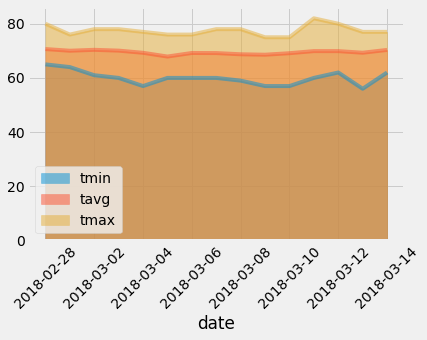

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()
plt.savefig("Image_save/normals.png")